## Librerias

In [1]:
!pip install imbalanced-learn
!pip install joblib
!pip install pydotplus
!pip install pydot
!pip install graphviz
!pip install Pillow
!pip install Image

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from datetime import datetime 
import time
import sys
%matplotlib inline

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=b642e1759857e1907b5e3be86029400b10aacbc9c14af7a0eb30b01f7e7582da
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 425, in _error_catcher
    yield
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\User\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\User\anaconda3\lib\http\client.py", line 457, in read
    n = self.readinto(b)
  File "C:\Users\User\anaconda3\lib\http\client.py", line 501, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\User\anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\User\anaconda3\lib\ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\User\anaconda3\lib\ssl.py", line 929, in read
    return self._sslobj.read(len, buffer)
socket.timeo

In [2]:
df0 = pd.read_excel(r"https://github.com/joatamayoav/Trabajo_Final_Analitica_Predictiva/blob/main/fraud_data.xlsx?raw=true"

    )

df0.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [3]:
df = df0.copy()
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


# Analisis descriptivo

In [5]:
sorted(df.columns)

['Amount',
 'Class',
 'V1',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V2',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9']

In [6]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.shape

(21693, 30)

In [8]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,...,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000
mean,-0.032403,0.047565,-0.091623,0.057805,-0.033983,-0.023207,-0.074203,0.002096,-0.044311,-0.091073,...,0.012471,0.003743,-0.001662,-0.002446,-0.000406,0.002367,0.001514,0.003203,86.776247,0.016411
std,2.106997,1.690911,1.870289,1.540329,1.530508,1.340599,1.596775,1.412650,1.158554,1.354886,...,0.850009,0.741348,0.629987,0.600144,0.520949,0.478279,0.424688,0.302048,235.644479,0.127052
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,...,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.929371,-0.592921,-0.962975,-0.850069,-0.698296,-0.779041,-0.565297,-0.205943,-0.669752,-0.554596,...,-0.225142,-0.538258,-0.162395,-0.356356,-0.317296,-0.326141,-0.069938,-0.053334,5.370000,0.000000
50%,0.007545,0.075215,0.176534,-0.012868,-0.063948,-0.281565,0.030859,0.023159,-0.073996,-0.099291,...,-0.024133,0.007273,-0.012327,0.036878,0.011561,-0.044870,0.002475,0.011765,21.950000,0.000000
75%,1.315678,0.819749,1.020809,0.772388,0.615287,0.383633,0.563751,0.328411,0.590212,0.445474,...,0.192954,0.530333,0.146616,0.431931,0.354043,0.238629,0.095859,0.081749,76.480000,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701538,...,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


# Análisis Exploratorio

In [9]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,Amount,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V1
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


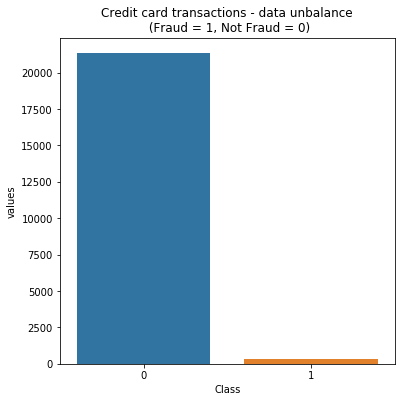

,Class,values
0,0,21337
1,1,356


In [11]:
temp = df["Class"].value_counts()

df1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

plt.figure(figsize = (6,6))

plt.title('Credit card transactions - data unbalance\n (Fraud = 1, Not Fraud = 0)')

sns.set_color_codes("pastel")
sns.barplot(x = 'Class', y="values", data=df1)

locs, labels = plt.xticks()

plt.show()
df1

# Modelación

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

In [13]:
def MatrixConfusion(cm, labels = ['pay','Class']):
    df = pd.DataFrame(data=cm, index=labels , columns=labels)
    df.index.name = 'True'
    df.columns.name = 'Prediction'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df


In [20]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=0)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()).astype(str))
    plt.yticks(tick_marks)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'roc_auc_score'],
                       columns=['BernoulliNB', 'GaussianNB', 'LogisticRegresion', 'kNN', 'DecisionTree', 'AdaBoost', 'RandomForest', 'GradientBoosting', 'RedesNeuronales' , 'SVMs'])

metrics

,BernoulliNB,GaussianNB,LogisticRegresion,kNN,DecisionTree,AdaBoost,RandomForest,GradientBoosting,RedesNeuronales,SVMs
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roc_auc_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Conjuntos de entrenamiento y prueba

In [18]:
target = 'Class'
X = df.drop('Class', axis = 1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=100, stratify=Y)

# BernoulliNB

Prediction   pay  Class  Total
True                          
pay         4250     18   4268
Class         13     58     71
Total       4263     76   4339

              precision    recall  f1-score   support

           0     0.9970    0.9958    0.9964      4268
           1     0.7632    0.8169    0.7891        71

    accuracy                         0.9929      4339
   macro avg     0.8801    0.9063    0.8927      4339
weighted avg     0.9931    0.9929    0.9930      4339

--- 0.14201664924621582 seconds ---
[0 0 0 ... 1 0 0]


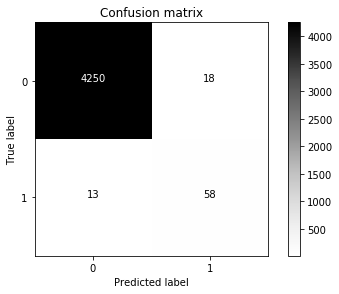

In [21]:
#
# Se importa la libreria
#
from sklearn.naive_bayes import BernoulliNB
start_time = time.time()
#
# Se crea un clasificador Gaussiano ingenuo
#
gnb = BernoulliNB(
    alpha=1.0,        # Laplace parameter
    binarize=1.0,
    fit_prior=True,
    class_prior=None,
)
#
# Se entrena el clasificador
#
gnb.fit(X_train, y_train)
#
# Se pronostica la clasificación de los
# mensajes para los datos de entrada
#
y_pred_test = gnb.predict(X_test)
#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

metrics.loc['accuracy','BernoulliNB'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','BernoulliNB'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','BernoulliNB'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','BernoulliNB'] = roc_auc_score(y_pred_test, y_test)
#
# Matriz Confusión
#
cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))

print(y_pred_test)

# GaussianNB

Prediction   pay  Class  Total
True                          
pay         4172     96   4268
Class          9     62     71
Total       4181    158   4339

              precision    recall  f1-score   support

           0     0.9978    0.9775    0.9876      4268
           1     0.3924    0.8732    0.5415        71

    accuracy                         0.9758      4339
   macro avg     0.6951    0.9254    0.7645      4339
weighted avg     0.9879    0.9758    0.9803      4339

--- 0.11999368667602539 seconds ---
[0 0 0 ... 1 0 0]


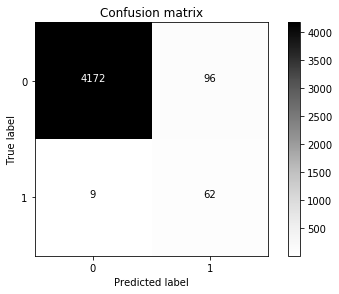

In [23]:
# # Se importa la libreria
#
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
#
# Se crea un clasificador Gaussiano ingenuo
#
gnb = GaussianNB()
#
# Se entrena el clasificador
#
gnb.fit(X_train, y_train)
#
# Se pronostica la clasificación de los
# mensajes para los datos de entrada
#
y_pred_test = gnb.predict(X_test)

#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

metrics.loc['accuracy','GaussianNB'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','GaussianNB'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','GaussianNB'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','GaussianNB'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))


print(y_pred_test)

# Regresión Logística

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Prediction   pay  Class  Total
True                          
pay         4266      2   4268
Class         11     60     71
Total       4277     62   4339

              precision    recall  f1-score   support

           0     0.9974    0.9995    0.9985      4268
           1     0.9677    0.8451    0.9023        71

    accuracy                         0.9970      4339
   macro avg     0.9826    0.9223    0.9504      4339
weighted avg     0.9969    0.9970    0.9969      4339

--- 0.5356898307800293 seconds ---
[0 0 0 ... 1 0 0]


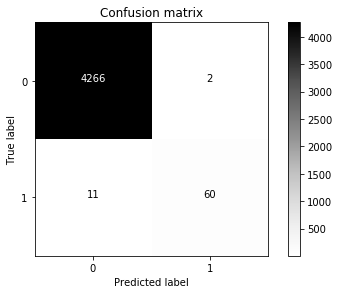

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


start_time = time.time()

logisticRegression = LogisticRegression(
    penalty="none",      # ‘l1’, ‘l2’, ‘elasticnet’, ‘none’
    tol=100,             # stop criteria
    C=0.0,               # factor inverso para regularizacion (SVM)
    fit_intercept=True,  #
    class_weight=None,   # None, dict or ‘balanced’
    random_state=1000,   #
    solver="lbfgs",      # 'newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
    max_iter=10000,        #
    multi_class="auto",  # ‘ovr’, ‘multinomial’, ‘auto’
    verbose=0,           #
    warm_start=True,    # ?re-usa la solución previa
    l1_ratio=None,       # Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1
    n_jobs=-1000,
)
logisticRegression.fit(X_train, y_train)
y_pred_test = logisticRegression.predict(X_test)
#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

metrics.loc['accuracy','LogisticRegresion'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticRegresion'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticRegresion'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','LogisticRegresion'] = roc_auc_score(y_pred_test, y_test)
#
# Matriz Confusión
#
cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)


#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))


print(y_pred_test)

# KNN

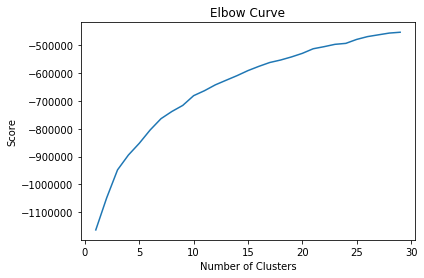

In [25]:
from sklearn.cluster import KMeans
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i, random_state=2) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_data(data_type, noise=0.2):
    
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(500, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(500, noise=noise, factor=0.6)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

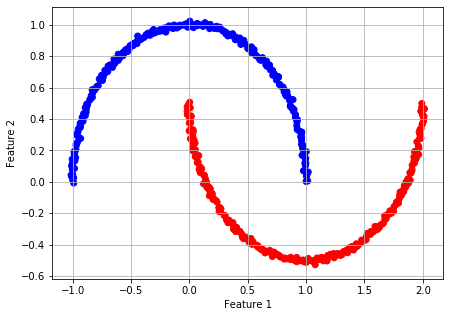

In [27]:
X, Y = generate_data('moons', noise=0.01)

color = ['blue' if y == 0 else 'red' for y in np.squeeze(Y)] # una lista para darle color a las clases

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

Prediction   pay  Class  Total
True                          
pay         4266      2   4268
Class         17     54     71
Total       4283     56   4339

              precision    recall  f1-score   support

           0     0.9960    0.9995    0.9978      4268
           1     0.9643    0.7606    0.8504        71

    accuracy                         0.9956      4339
   macro avg     0.9802    0.8800    0.9241      4339
weighted avg     0.9955    0.9956    0.9954      4339

--- 393.25765204429626 seconds ---
[0 0 0 ... 1 0 0]


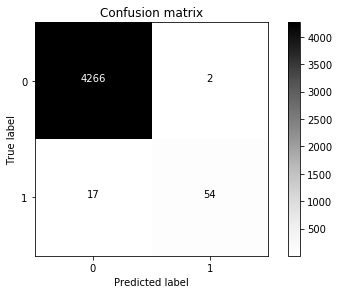

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

#
# Predicción para el conjunto de prueba
#
y_pred_test = knn.predict(X_test)

#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

metrics.loc['accuracy','kNN'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','kNN'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','kNN'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','kNN'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))


print(y_pred_test)

# DecisionTreeClassifier

Prediction   pay  Class  Total
True                          
pay         4264      4   4268
Class         19     52     71
Total       4283     56   4339

              precision    recall  f1-score   support

           0     0.9956    0.9991    0.9973      4268
           1     0.9286    0.7324    0.8189        71

    accuracy                         0.9947      4339
   macro avg     0.9621    0.8657    0.9081      4339
weighted avg     0.9945    0.9947    0.9944      4339

--- 461.59245014190674 seconds ---
[0 0 0 ... 1 0 0]


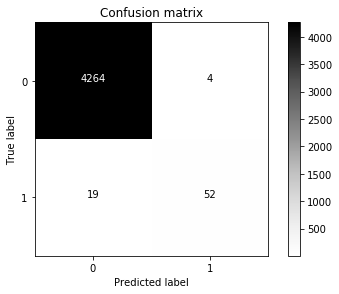

In [36]:
from sklearn.tree import DecisionTreeClassifier

#
# Se construye el arbol
#
decisiontree = DecisionTreeClassifier(
    criterion="gini",
    splitter="random",
    max_depth=None,
    min_samples_split=3000,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=10,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
)

#
# Se entrena para los datos de prueba
#
decisiontree.fit(X_train, y_train)

#
# Se pronostica para la muestra de prueba
#
y_pred_test = decisiontree.predict(X_test)

#
# Evaluación
#

y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


metrics.loc['accuracy','DecisionTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','DecisionTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','DecisionTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','DecisionTree'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))


print(y_pred_test)

In [37]:
import pydotplus
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz


def display_tree(clf):

    dot_data = StringIO()
    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        rounded=True,
        special_characters=True,
    )

    return pydotplus.graph_from_dot_data(dot_data.getvalue()).create_png()

In [38]:
Image(display_tree(decisiontree))

InvocationException: GraphViz's executables not found

# Ensambles de Modelos

Prediction   pay  Class  Total
True                          
pay         4263      5   4268
Class         21     50     71
Total       4284     55   4339

              precision    recall  f1-score   support

           0     0.9951    0.9988    0.9970      4268
           1     0.9091    0.7042    0.7937        71

    accuracy                         0.9940      4339
   macro avg     0.9521    0.8515    0.8953      4339
weighted avg     0.9937    0.9940    0.9936      4339

--- 558.4610800743103 seconds ---
[0 0 0 ... 1 0 0]


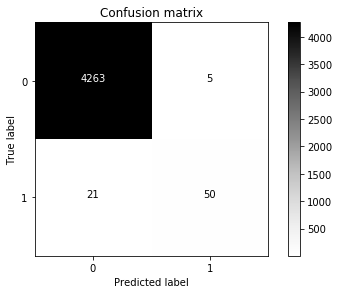

In [39]:
#
# AdaBoostClassifier
#
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=10)

#
# Se entrena para los datos de prueba
#
AdaBoost.fit(X_train, y_train)

#
# Se pronostica para la muestra de prueba
#
y_pred_test = AdaBoost.predict(X_test)

#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


metrics.loc['accuracy','AdaBoost'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','AdaBoost'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','AdaBoost'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','AdaBoost'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))


print(y_pred_test)

Prediction   pay  Class  Total
True                          
pay         4267      1   4268
Class         12     59     71
Total       4279     60   4339

              precision    recall  f1-score   support

           0     0.9972    0.9998    0.9985      4268
           1     0.9833    0.8310    0.9008        71

    accuracy                         0.9970      4339
   macro avg     0.9903    0.9154    0.9496      4339
weighted avg     0.9970    0.9970    0.9969      4339

--- 591.5687346458435 seconds ---
[0 0 0 ... 1 0 0]


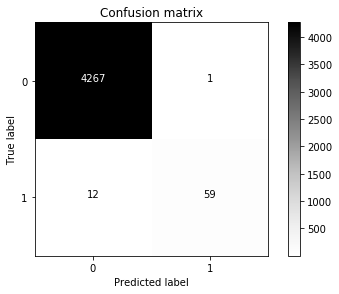

In [40]:
#
# RandomForestClassifier
#
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=10)

#
# Se entrena para los datos de prueba
#
RandomForest.fit(X_train, y_train)

#
# Se pronostica para la muestra de prueba
#
y_pred_test = RandomForest.predict(X_test)

#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','RandomForest'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))

print(y_pred_test)

Prediction   pay  Class  Total
True                          
pay         4264      4   4268
Class         10     61     71
Total       4274     65   4339

              precision    recall  f1-score   support

           0     0.9977    0.9991    0.9984      4268
           1     0.9385    0.8592    0.8971        71

    accuracy                         0.9968      4339
   macro avg     0.9681    0.9291    0.9477      4339
weighted avg     0.9967    0.9968    0.9967      4339

--- 622.2830271720886 seconds ---
[0 0 0 ... 1 0 0]


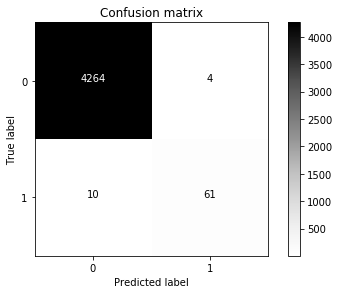

In [41]:
#
# GradientBoostingClassifier
#
from sklearn.ensemble import GradientBoostingClassifier

GradientBoosting = GradientBoostingClassifier(n_estimators=10)

#
# Se entrena para los datos de prueba
#
GradientBoosting.fit(X_train, y_train)

#
# Se pronostica para la muestra de prueba
#
y_pred_test = GradientBoosting.predict(X_test)

#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


metrics.loc['accuracy','GradientBoosting'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','GradientBoosting'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','GradientBoosting'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','GradientBoosting'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))


print(y_pred_test)

# Redes Neuronales

Prediction   pay  Class  Total
True                          
pay         4265      3   4268
Class         10     61     71
Total       4275     64   4339

              precision    recall  f1-score   support

           0     0.9977    0.9993    0.9985      4268
           1     0.9531    0.8592    0.9037        71

    accuracy                         0.9970      4339
   macro avg     0.9754    0.9292    0.9511      4339
weighted avg     0.9969    0.9970    0.9969      4339

--- 671.6866364479065 seconds ---
[0 0 0 ... 1 0 0]


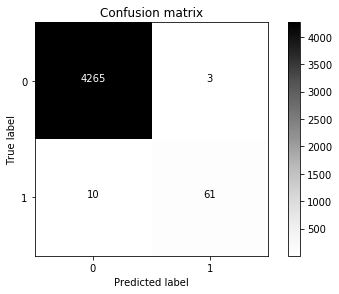

In [42]:
from sklearn.neural_network import MLPClassifier

#
# El parámetro hidden_layer_sizes recibe una tupla que
# indica la cantidad de neuronas de cada capa oculta. En
# el caso presentado, el valor (6,) indica que hay una sola
# capa oculta con 6 neuronas que usan la función sigmoidea.
# El parámetro solver = 'sgd' indica que se usará el
# algoritmo de gradiente descendente estocástico para entrenar
# la red neuronal.
#

RedesNeuronales = MLPClassifier(

    hidden_layer_sizes=(6,),   # Una capa oculta con una neurona
    activation="logistic",     #  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
    solver="sgd",              #  {‘lbfgs’, ‘sgd’, ‘adam’}
    alpha=0.0,                 #
    learning_rate_init=0.1,    # Valor de la tasa de aprendizaje
    learning_rate="adaptive",  # La tasa no se adapta automáticamente
    verbose=False,             # Reporte del proceso de optimización
    shuffle=True,              #
    tol=1e-4,                  #
    max_iter=25000,            # Número máximo de iteraciones
    momentum=0.9,              #
    nesterovs_momentum=False,  #
)

#
# Se entrena para los datos de prueba
#
RedesNeuronales.fit(X_train, y_train)

#
# Se pronostica para la muestra de prueba
#
y_pred_test = RedesNeuronales.predict(X_test)

#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


metrics.loc['accuracy','RedesNeuronales'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
metrics.loc['precision','RedesNeuronales'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RedesNeuronales'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','RedesNeuronales'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))

print(y_pred_test)

# SVC

Prediction   pay  Class  Total
True                          
pay         4254     14   4268
Class         17     54     71
Total       4271     68   4339

              precision    recall  f1-score   support

           0     0.9960    0.9967    0.9964      4268
           1     0.7941    0.7606    0.7770        71

    accuracy                         0.9929      4339
   macro avg     0.8951    0.8786    0.8867      4339
weighted avg     0.9927    0.9929    0.9928      4339

--- 0.5043296813964844 seconds ---
[0 0 0 ... 1 0 0]


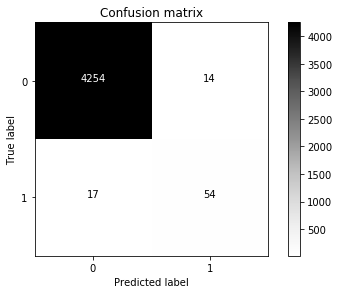

In [43]:
from sklearn.svm import SVC

start_time = time.time()

svc = SVC(kernel="sigmoid")

svc.fit(X_train, y_train)

#
# Se pronostica para la muestra de prueba
#
y_pred_test = svc.predict(X_test)

#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


metrics.loc['accuracy','SVMs'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
metrics.loc['precision','SVMs'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','SVMs'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','SVMs'] = roc_auc_score(y_pred_test, y_test)

#
# Matriz Confusión
#

cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
pr = MatrixConfusion(cm)
print(pr)
print()
plot_confusion_matrix(cm)

#
# Reporte
#

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=y_pred_test)
print(sk_report)

print("--- %s seconds ---" % (time.time() - start_time))

print(y_pred_test)


In [44]:
100*metrics

,BernoulliNB,GaussianNB,LogisticRegresion,kNN,DecisionTree,AdaBoost,RandomForest,GradientBoosting,RedesNeuronales,SVMs
accuracy,99.2855,97.5801,99.7004,99.5621,99.4699,99.4008,99.7004,99.6773,99.7004,99.2855
precision,76.3158,39.2405,96.7742,96.4286,92.8571,90.9091,98.3333,93.8462,95.3125,79.4118
recall,81.6901,87.3239,84.507,76.0563,73.2394,70.4225,83.0986,85.9155,85.9155,76.0563
roc_auc_score,88.0054,69.5126,98.2585,98.0158,96.2068,95.2094,99.0264,96.8061,97.5393,89.5069


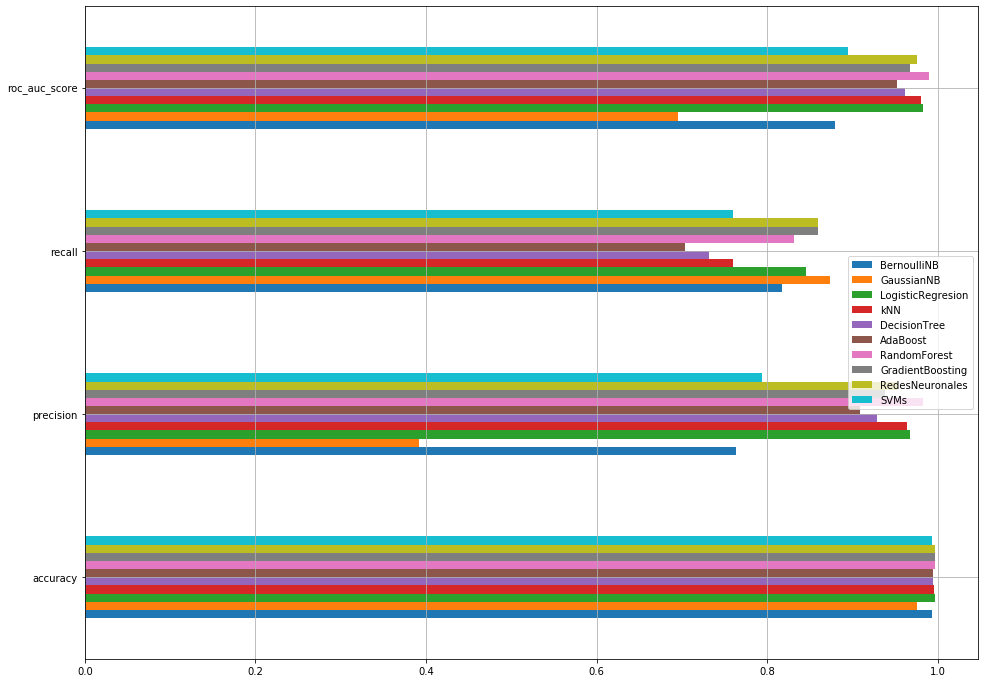

In [45]:
fig, ax = plt.subplots(figsize = (16, 12))
metrics.plot(kind='barh', ax=ax)
ax.grid();